# Donut-Shaped Biomarker Classification in Lab Animals:

##### This simple Project simulates a non-linear Classification problem inspired by toxicology/pharmacology studies in lab animal medicine. 
##### We generate synthetic biomarker data ('x1', 'x2') representing two groups: 
- Healthy animals (low marker activity) 
- Affected animals(high marker activity).
##### The goal is to simulate, visualize, and prepare the dataset for future ML tasks.
##### Note: Since we do not have real data, we had to generate our own.

## Section 1: Imports and Setup

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(50)

## Section 2: Simulate Donut Dataset
### 2.1. Simulate "Normal" Animals (inner Donut)

In [52]:
N = 500

In [53]:
radius_inner = 5 + np.random.randn(N) * 0.75 # Coefficeint of Variation(CV) is 15% 

In [54]:
theta_inner = np.random.uniform(0, 2 * np.pi, N)

In [55]:
x1_inner = radius_inner * np.cos(theta_inner)
x2_inner = radius_inner * np.sin(theta_inner)

In [56]:
y_inner = np.zeros(N)

### 2.2. Simulate the Outer Ring (Affected Animals)

In [58]:
N = 500

In [59]:
radius_outer = 10 + np.random.randn(N) * 0.75

In [60]:
theta_outer = np.random.uniform(0, 2 * np.pi, N)

In [61]:
x1_outer = radius_outer * np.cos(theta_outer)
x2_outer = radius_outer * np.sin(theta_outer)

In [62]:
y_outer = np.ones(N)

### 2.3. Combining Both Groups into One Dataset

In [64]:
x1 = np.concatenate((x1_inner, x1_outer))
x2 = np.concatenate((x2_inner, x2_outer))
y = np.concatenate((y_inner, y_outer))

In [65]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

In [66]:
df

,x1,x2,y
0,3.803914,-0.443977,0.0
1,-4.976196,0.075376,0.0
2,4.408692,1.059880,0.0
3,-3.730531,-1.142516,0.0
4,5.940036,1.194558,0.0
...,...,...,...
995,-6.312340,6.691137,1.0
996,-0.178682,9.122707,1.0
997,-10.231280,-0.215628,1.0
998,5.657214,-8.646789,1.0


## Section 3: Plotting the Donut

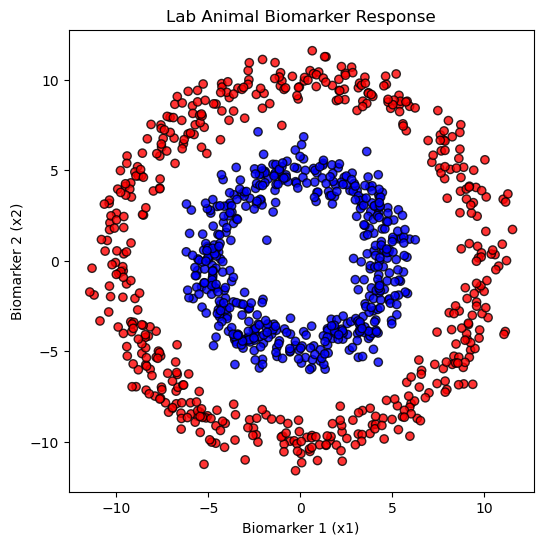

In [68]:
plt.figure(figsize=(6, 6))
labels = ['blue' if y[i] == 0 else 'red'for i in range(len(y))]    
plt.scatter(x1, x2, c= labels, alpha=0.8, edgecolors='k')
plt.xlabel("Biomarker 1 (x1)")
plt.ylabel("Biomarker 2 (x2)")
plt.title("Lab Animal Biomarker Response")
plt.show()

## Section 4: Feature Egnineering

In [89]:
df['x1_squared'] = df['x1'] ** 2
df['x2_cubed'] = df['x2'] ** 3
df['x1_times_x2'] = df['x1'] * df['x2']

In [91]:
df[['x1', 'x2', 'y', 'x1_squared', 'x2_cubed', 'x1_times_x2']].to_csv("donut_dataset.csv", index=False, header=False)